#Transfer Learning with **Resnet Training**(False) and **data augmentation** (True)


1.   Epochs=50
2.   Learning rate=0.0001
1.   Image size=(200,200)
2.   Image=Grayscale
1.   Defect_classes=['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
1.   batch_size=16
1.   optimizer=adam





















# Importing the libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data organised in folders

# Folder path and location

In [2]:
#for desktop
#path=r'./NEU Metal Surface Defects Data' 

In [3]:
# accessing data from colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# folder path for colab
path=r'/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data'

# Contents and data organization within folder

In [5]:
print("Main Folder")
os.listdir(path)

Main Folder


['Thumbs.db', 'train', 'test', 'valid']

In [6]:
print("Train sub-folder")
os.listdir(path+'/train')

Train sub-folder


['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']

In [7]:
classes_defects=os.listdir(path+'/train')
print(classes_defects)

['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']


In [8]:
print("files within sub-folder Patches")
os.listdir(path+'/train/Patches')[:3]

files within sub-folder Patches


['Pa_206.bmp', 'Pa_165.bmp', 'Pa_145.bmp']

In [9]:
len(os.listdir(path+'/train'))

6

# Image characteristics

In [10]:
img1=Image.open(path+'/train/Patches/Pa_206.bmp')
print(img1.filename)
print(img1.format)
print(img1.mode)
print(img1.size)

# # The "L" mode represents grayscale here.... So it can hold any of 256 shades of Gray 
# (includes black and white as Gray shades).
# # The "P" mode can hold 256 different colors like red,blue, green etc....
# https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil#:~:text=Examples%3A%208%20bit%20black%20and,are%20%22P%22%20mode..

/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data/train/Patches/Pa_206.bmp
BMP
L
(200, 200)


(200, 200)
max_pixel_value: 255


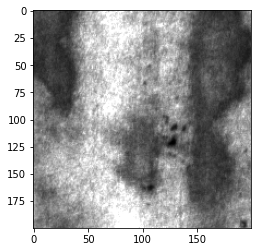

In [11]:
image=plt.imread(path+'/train/Patches/Pa_206.bmp')
print(image.shape)
plt.imshow(image,cmap='gray')
print("max_pixel_value: {}".format(image.max()))

# ImageDataGenerator and flow_from_directory for datasets

Sources:

1.   https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
2.   https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/TensorFlow/Basics/tutorial18-customdata-images/1_in_subfolders.py



In [12]:
data_generator=ImageDataGenerator(
    rescale=1.0/255,
    dtype=tf.float32
)

# Train dataloader

In [13]:
train_ds=data_generator.flow_from_directory(
    path+'/train',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=16
)

Found 1667 images belonging to 6 classes.


# Valid dataloader

In [14]:
valid_ds=data_generator.flow_from_directory(
    path+'/valid',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=16
)

Found 72 images belonging to 6 classes.


# Test dataloader

In [15]:
test_ds=data_generator.flow_from_directory(
    path+'/test',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=False,
    seed=1,
    batch_size=1
)

Found 72 images belonging to 6 classes.


# Dataloader sanity check

In [16]:
print("Dataloader_length(Images,labels)", len(train_ds[0]))
print("image list length",len(train_ds[0][0]))
print("image shape", train_ds[0][0].shape)
print("Defect List: ",classes_defects)
print("Defect dictionary in dataloader: ",train_ds.class_indices)
print(train_ds.labels[1660])
print(train_ds.classes)
print(train_ds.class_indices.keys())
print(train_ds.class_indices.values())
#print([train_ds.class_indices(x)] for x in train_ds.classes])

Dataloader_length(Images,labels) 2
image list length 16
image shape (16, 200, 200, 3)
Defect List:  ['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
Defect dictionary in dataloader:  {'Inclusion': 0, 'Patches': 1, 'Crazing': 2, 'Pitted': 3, 'Scratches': 4, 'Rolled': 5}
5
[0 0 0 ... 5 5 5]
dict_keys(['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled'])
dict_values([0, 1, 2, 3, 4, 5])


Image_shape:  (16, 200, 200, 3)
Label_value:  3.0
['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
tf.Tensor([3 0 5 3 0 3 0 5 4 2 0 3 4 3 0 1], shape=(16,), dtype=uint8)
Pitted


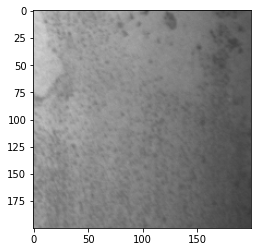

In [17]:
for images,labels in train_ds:
  plt.imshow(images[0],cmap='gray')
  print("Image_shape: ",images.shape)
  print("Label_value: ",labels[0])
  labels=tf.cast(labels,tf.uint8)
  print(classes_defects)
  print((labels))
  print(classes_defects[labels[0]])
  break

In [18]:
#

# Model architecture and Pretrained model import from keras

Sources:


1.   https://keras.io/api/applications/
2.   https://towardsdatascience.com/transfer-learning-for-image-classification-using-tensorflow-71c359b56673



In [19]:
from tensorflow.keras.applications import ResNet50

In [20]:
feature_extractor=ResNet50(weights='imagenet',input_shape=(200,200,3),include_top=False)
feature_extractor.trainable=False

94781440/94765736 [==============================] - 1s 0us/step


In [21]:
data_aug=keras.Sequential([
                          #  tf.keras.Input(shape=(200,200,3)),
                          #  layers.experimental.preprocessing.Resizing(height=224,width=224),
                           layers.experimental.preprocessing.RandomContrast(factor=0.25),
                           layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                           layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                           layers.experimental.preprocessing.RandomRotation(0.5),
                           layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [22]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug(input_)
x=feature_extractor(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [23]:
model=keras.Model(input_,output_)

# Final Model architecture summary

In [24]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                             

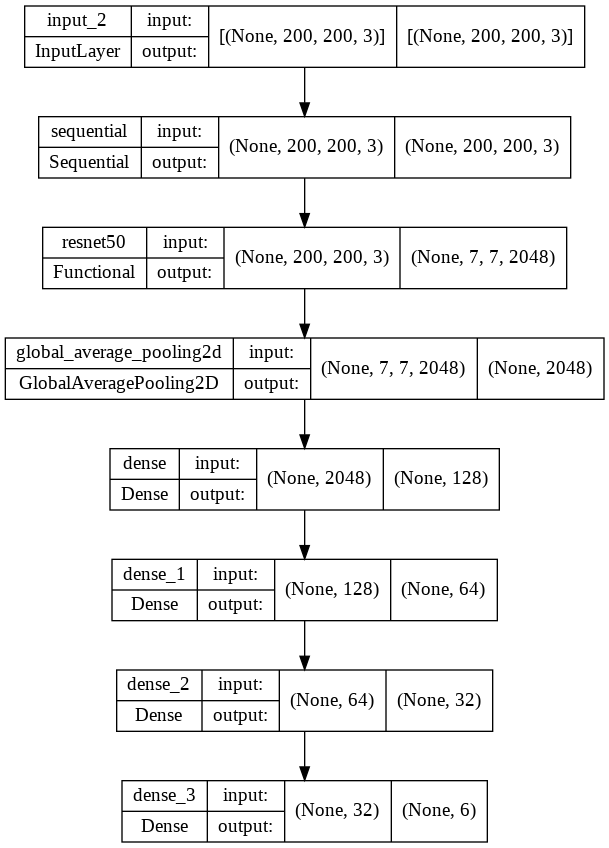

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Model training

In [26]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [27]:
history=model.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 765s 7s/step - loss: 1.7987 - accuracy: 0.1632 - val_loss: 1.7874 - val_accuracy: 0.2639
Epoch 2/50
105/105 [==============================] - 7s 64ms/step - loss: 1.7869 - accuracy: 0.1890 - val_loss: 1.7779 - val_accuracy: 0.2917
Epoch 3/50
105/105 [==============================] - 7s 69ms/step - loss: 1.7789 - accuracy: 0.2172 - val_loss: 1.7677 - val_accuracy: 0.1667
Epoch 4/50
105/105 [==============================] - 7s 65ms/step - loss: 1.7710 - accuracy: 0.2196 - val_loss: 1.7678 - val_accuracy: 0.2778
Epoch 5/50
105/105 [==============================] - 7s 65ms/step - loss: 1.7595 - accuracy: 0.2346 - val_loss: 1.7516 - val_accuracy: 0.3333
Epoch 6/50
105/105 [==============================] - 7s 65ms/step - loss: 1.7463 - accuracy: 0.2382 - val_loss: 1.7400 - val_accuracy: 0.2500
Epoch 7/50
105/105 [==============================] - 7s 65ms/step - loss: 1.7290 - accuracy: 0.2819 - val_loss: 1.7296 - val_accuracy: 0.3750

# Test dataloader evaluation, Saving and loading weights

In [28]:
model.evaluate(test_ds)

72/72 [==============================] - 37s 516ms/step - loss: 1.2861 - accuracy: 0.4444


[1.2861418724060059, 0.4444444477558136]

In [29]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Tlab')

In [30]:
# For creating new directory
#os.makedirs('Resnet50/Resnet50_training_false_aug_true')

In [31]:
os.chdir('./Resnet50/Resnet50_training_false_aug_true')

In [35]:
#For saving weights
model.save_weights('training_02.ckpt')

In [36]:
model_new=keras.Model(input_,output_)

In [ ]:
model_new.load_weights('./training_02.ckpt')

In [38]:
model_new.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'],
              )

In [39]:
model_new.evaluate(test_ds)

72/72 [==============================] - 3s 16ms/step - loss: 1.2861 - accuracy: 0.4444


[1.2861418724060059, 0.4444444477558136]

# Performance

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Loss vs epochs

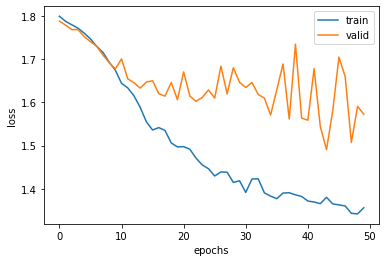

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

Accuracy vs epochs

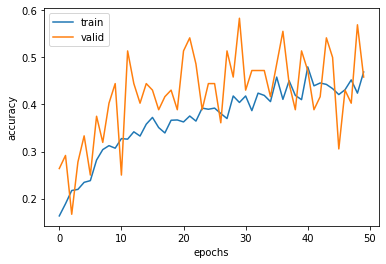

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
#plt.yscale()
plt.legend(['train','valid'])

# Predictions

In [43]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [44]:
X_test=[]
y_test=[]
for i in range(len(test_ds)):
  dataiter = iter(test_ds)
  images, labels = dataiter.next()
  X_test.extend(images)
  y_test.extend(labels)

In [45]:
print(len(X_test))

72


In [46]:
y_test=[int(x) for x in y_test]
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [47]:
y_predict=model_new.predict(np.array(X_test))
print(y_predict[:2])
y_hat=[np.argmax(x) for x in y_predict]
print(y_hat)

[[-0.40527043 -2.1299272  -2.3129585  -0.21720515 -0.26125023 -0.30061537]
 [-0.32399625 -2.2028134  -2.4005625  -0.17979689 -0.27953213 -0.28675878]]
[3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 3, 0, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 1, 3, 1, 4, 0, 3, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4]


In [48]:
print(classification_report(y_test, y_hat, target_names=classes_defects))

              precision    recall  f1-score   support

   Inclusion       0.60      0.50      0.55        12
     Patches       0.46      0.50      0.48        12
     Crazing       0.64      0.75      0.69        12
      Pitted       0.28      0.75      0.41        12
   Scratches       0.67      0.17      0.27        12
      Rolled       0.00      0.00      0.00        12

    accuracy                           0.44        72
   macro avg       0.44      0.44      0.40        72
weighted avg       0.44      0.44      0.40        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print(confusion_matrix(y_test, y_hat))

[[ 6  0  0  6  0  0]
 [ 0  6  5  1  0  0]
 [ 0  3  9  0  0  0]
 [ 2  1  0  9  0  0]
 [ 2  3  0  5  2  0]
 [ 0  0  0 11  1  0]]


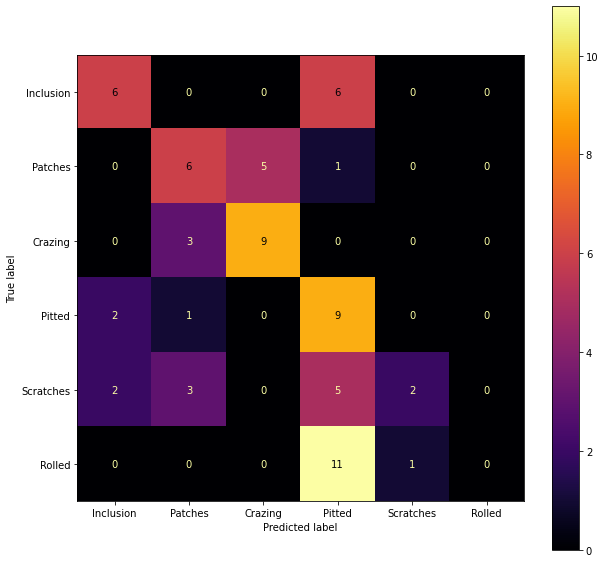

In [50]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat),display_labels=classes_defects)
fig,ax=plt.subplots(figsize=(10,10))
cmd.plot(ax=ax,cmap="inferno")

In [ ]:
# import numpy as np
# sample=np.expand_dims(X_test[0],axis=0)
# sample_predict=model.predict(sample)
# plt.imshow(X_test[0],cmap='gray')
# print(sample_predict, "Max: ", np.argmax(sample_predict))
# print("predicted label: ",classes_defects[np.argmax(sample_predict)])
# print("Actual label: ",classes_defects[int(y_test[0])])

In [ ]:
# sample = iter(test_ds)
# images, labels = sample.next()
# print(images.shape)
# sample_predict=model.predict(images)
# plt.imshow(images,cmap='gray')
# print(sample_predict, "Max: ", np.argmax(sample_predict))
# print("predicted label: ",classes_defects[np.argmax(sample_predict)])
# print("Actual label: ",classes_defects[int(labels)])